In [89]:
import warnings
warnings.filterwarnings('ignore')

In [146]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

In [90]:
## Loading data
import pandas as pd

# Load the raw data
df_raw = pd.read_csv('../data/survey.csv', header=0)
df_raw

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [91]:
##Divide the data into train and test
from sklearn.model_selection import train_test_split

# Divide the training data into training (80%) and test (20%)
df_raw_train, df_raw_test = train_test_split(df_raw, train_size=0.8, random_state=42)

# Reset the index
df_raw_train, df_raw_test = df_raw_train.reset_index(drop=True), df_raw_test.reset_index(drop=True)

In [92]:
# Make a copy of df_raw_train
df_train = df_raw_train.copy(deep=True)

# Make a copy of df_raw_test
df_test = df_raw_test.copy(deep=True)

# Get the name of the target
target = 'treatment'

In [93]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,1007,27


In [94]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,252,27


In [95]:
# Print the first 10 rows of df_train
df_train.head(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 13:33:32,25,Male,South Africa,NaN,No,No,No,NaN,6-25,...,Somewhat difficult,Maybe,No,Some of them,Yes,No,Yes,No,No,NaN
1,2014-08-27 17:00:15,38,male,United States,VA,No,Yes,Yes,Sometimes,More than 1000,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
2,2014-08-29 05:57:48,26,Female,United Kingdom,NaN,Yes,Yes,Yes,Sometimes,1-5,...,Very easy,Maybe,No,Some of them,Yes,No,Maybe,Yes,No,I am a Trans woman and suffer from depression ...
3,2014-08-27 12:56:56,28,Male,United Kingdom,NaN,No,Yes,Yes,Sometimes,More than 1000,...,Don't know,Maybe,Maybe,Some of them,No,No,Maybe,Don't know,No,NaN
4,2014-08-27 13:55:38,30,Male,Ireland,NaN,Yes,No,No,Sometimes,1-5,...,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,No,No,NaN
5,2014-08-27 19:41:28,32,Male,United States,CA,No,No,Yes,Sometimes,More than 1000,...,Somewhat easy,No,No,Yes,Some of them,Maybe,Yes,Don't know,No,NaN
6,2014-08-27 16:25:26,24,Female,United States,CA,Yes,Yes,Yes,Sometimes,1-5,...,Don't know,No,No,Some of them,Some of them,No,No,Don't know,Yes,NaN
7,2014-08-27 16:21:11,28,Female,United States,NY,No,Yes,Yes,Sometimes,26-100,...,Don't know,Yes,Maybe,Some of them,No,No,Maybe,Don't know,No,NaN
8,2014-08-28 10:29:47,37,m,United Kingdom,NaN,No,No,Yes,Often,6-25,...,Don't know,Yes,No,Yes,Yes,Maybe,Yes,No,No,NaN
9,2014-09-20 13:51:05,26,Female,United States,MI,No,Yes,Yes,Rarely,100-500,...,Don't know,Maybe,Maybe,No,No,No,Maybe,No,No,NaN


In [96]:
#Dividing the Training data into Training and Validation
# Divide the training data into training (80%) and validation (20%)
df_train, df_valid = train_test_split(df_train, train_size=0.8, random_state=42)

# Reset the index
df_train, df_valid = df_train.reset_index(drop=True), df_valid.reset_index(drop=True)


In [97]:
#Handling the Identifiers

# Combine df_train, df_valid and df_test
df = pd.concat([df_train, df_valid, df_test], sort=False)

df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

### Identifying the identifiers
The code below shows how to find identifiers from the data.

In [98]:
def id_checker(df):
    """
    The identifier checker

    Parameters
    ----------
    df : dataframe
    
    Returns
    ----------
    The dataframe of identifiers
    """
    
    # Get the identifiers
    df_id = df[[var for var in df.columns 
                if (df[var].dtype != 'float'
                    and df[var].nunique(dropna=True) == df[var].notnull().sum())]]
    
    return df_id

In [99]:
# Call id_checker on df
df_id = id_checker(df)

# Print the first 5 rows of df_id
df_id.head()

""
0
1
2
3
4


### Removing the Identifiers
The code below shows how to remove the identifiers from data (using pandas DataFrame.drop).

In [100]:
import numpy as np

# Remove the identifiers from df_train
df_train = df_train.drop(columns=np.intersect1d(df_id.columns, df_train.columns))

# Remove the identifiers from df_valid
df_valid = df_valid.drop(columns=np.intersect1d(df_id.columns, df_valid.columns))

# Remove the identifiers from df_test
df_test = df_test.drop(columns=np.intersect1d(df_id.columns, df_test.columns))

### Combining the training, validation and testing data
The code below shows how to combine the training, validation and testing data (using pandas concat).

In [101]:
# Combine df_train, df_valid and df_test
df = pd.concat([df_train, df_valid, df_test], sort=False)

### Identifying missing values
The code below shows how to find variables with NaN (using pandas DataFrame.isna), their proportion of NaN and 
dtype (data type objects, using pandas Series.dtype).

In [102]:
def nan_checker(df):
    """
    The NaN checker

    Parameters
    ----------
    df : dataframe
    
    Returns
    ----------
    The dataframe of variables with NaN, their proportion of NaN and dtype
    """
    
    # Get the dataframe of variables with NaN, their proportion of NaN and dtype
    df_nan = pd.DataFrame([[var, df[var].isna().sum() / df.shape[0], df[var].dtype]
                           for var in df.columns if df[var].isna().sum() > 0],
                          columns=['var', 'proportion', 'dtype'])
    
    # Sort df_nan in accending order of the proportion of NaN
    df_nan = df_nan.sort_values(by='proportion', ascending=False).reset_index(drop=True)
    
    return df_nan

In [103]:
# Call nan_checker on df
df_nan = nan_checker(df)

# Print df_nan
df_nan

,var,proportion,dtype
0,comments,0.869738,object
1,state,0.409055,object
2,work_interfere,0.209690,object
3,self_employed,0.014297,object


In [104]:
# Print the unique dtype of the variables with NaN
pd.DataFrame(df_nan['dtype'].unique(), columns=['dtype'])

,dtype
0,object


In [105]:
import numpy as np
# Print df_miss
df_miss = ['Timestamp', 'comments', 'state']

df_train = df_train.drop(df_miss, axis= 1)
df_valid = df_valid.drop(df_miss, axis= 1)
df_test = df_test.drop(df_miss, axis= 1)

In [106]:
# Print the dimension of df_remove_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,805,24


In [107]:
# Print the dimension of df_remove_valid
pd.DataFrame([[df_valid.shape[0], df_valid.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,202,24


In [108]:
# Print the dimension of df_remove_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,252,24


In [109]:
# Combine df_train, df_valid and df_test
df = pd.concat([df_train, df_valid, df_test], sort=False)
pd.DataFrame(df['self_employed'].unique(), columns=['self_employed'])
df['self_employed'] = df['self_employed'].replace(np.nan,'No')
df['self_employed'].unique()

array(['No', 'Yes'], dtype=object)

In [110]:
#Removes Age values <18 and >100
df.drop( df[ ( df['Age'] < 18 ) ^ (df['Age'] > 100) ].index , inplace=True)
pd.DataFrame([[df.shape[0], df.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,1245,24


In [111]:
pd.DataFrame(df['Gender'].unique(), columns=['Gender'])

,Gender
0,Male
1,m
2,male
3,M
4,Female
5,Make
6,Woman
7,Androgyne
8,female
9,queer


In [112]:
#clean 'Gender'
#Slower case all columm's elements
gender = df['Gender'].str.lower()
#print(gender)

#Select unique elements
gender = df['Gender'].unique()

#Made gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]


for (row, col) in df.iterrows():

    if str.lower(col.Gender) in male_str:
        df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

In [113]:
pd.DataFrame(df['Gender'].unique(), columns=['Gender'])

,Gender
0,male
1,female
2,trans


In [114]:
newDF = {}

for column in df.columns[0:]:
    if column != 'Age' and column != 'Country':
          data = list(df[column].unique())
          newDF[column] = data
        
newDF

{'Gender': ['male', 'female', 'trans'],
 'self_employed': ['No', 'Yes'],
 'family_history': ['No', 'Yes'],
 'treatment': ['No', 'Yes'],
 'work_interfere': ['Sometimes', nan, 'Never', 'Often', 'Rarely'],
 'no_employees': ['More than 1000',
  '1-5',
  '26-100',
  '6-25',
  '100-500',
  '500-1000'],
 'remote_work': ['Yes', 'No'],
 'tech_company': ['Yes', 'No'],
 'benefits': ['No', "Don't know", 'Yes'],
 'care_options': ['Not sure', 'No', 'Yes'],
 'wellness_program': ['No', "Don't know", 'Yes'],
 'seek_help': ['No', "Don't know", 'Yes'],
 'anonymity': ["Don't know", 'Yes', 'No'],
 'leave': ['Very difficult',
  'Very easy',
  "Don't know",
  'Somewhat easy',
  'Somewhat difficult'],
 'mental_health_consequence': ['Yes', 'Maybe', 'No'],
 'phys_health_consequence': ['Maybe', 'No', 'Yes'],
 'coworkers': ['No', 'Some of them', 'Yes'],
 'supervisor': ['No', 'Yes', 'Some of them'],
 'mental_health_interview': ['No', 'Maybe', 'Yes'],
 'phys_health_interview': ['Maybe', 'Yes', 'No'],
 'mental_vs_ph

### Identifying the Categorical Variables
The code below shows how to find the categorical variables that have object as dtype (using pandas.Series.dtype).

In [115]:
def cat_var_checker(df):
    """
    The categorical variable checker

    Parameters
    ----------
    df: the dataframe
    
    Returns
    ----------
    The dataframe of categorical variables and their number of unique value
    """
    
    # Get the dataframe of categorical variables and their number of unique value
    df_cat = pd.DataFrame([[var, df[var].nunique(dropna=False)]
                           for var in df.columns if df[var].dtype == 'object'],
                          columns=['var', 'nunique'])
    
    # Sort df_cat in accending order of the number of unique value
    df_cat = df_cat.sort_values(by='nunique', ascending=False).reset_index(drop=True)
    
    return df_cat

In [116]:
# Call cat_var_checker on df
df_cat = cat_var_checker(df)

# Print the dataframe
df_cat

,var,nunique
0,Country,46
1,no_employees,6
2,work_interfere,5
3,leave,5
4,Gender,3
5,anonymity,3
6,mental_vs_physical,3
7,phys_health_interview,3
8,mental_health_interview,3
9,supervisor,3


### Encoding the categorical features
The code below shows how to encode the categorical features in the combined data (using pandas.get\_dummies).

In [117]:
# One-hot-encode the categorical features in the combined data
df = pd.get_dummies(df, columns=np.setdiff1d(df_cat['var'], [target]))

# Print the first 10 rows (samples) of df
df.head(10)

,Age,treatment,Country_Australia,Country_Austria,Country_Belgium,Country_Bosnia and Herzegovina,Country_Brazil,Country_Bulgaria,Country_Canada,Country_China,...,supervisor_Yes,tech_company_No,tech_company_Yes,wellness_program_Don't know,wellness_program_No,wellness_program_Yes,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes
0,43,No,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,43,No,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
2,21,No,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
3,29,No,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,0
4,28,Yes,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
5,41,No,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
6,34,Yes,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
7,29,Yes,0,0,0,0,0,0,0,0,...,1,0,1,1,0,0,0,1,0,0
8,28,No,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
9,25,Yes,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0


### Encoding the categorical target
The code below shows how to encode the categorical target in the combined data (using sklearn.LabelEncoder).

In [118]:
from sklearn.preprocessing import LabelEncoder

# The LabelEncoder
le = LabelEncoder()

# Encode the categorical target in the combined data
df[target] = le.fit_transform(df[target].astype(str))

# Print the first 5 rows of df
df.head()

,Age,treatment,Country_Australia,Country_Austria,Country_Belgium,Country_Bosnia and Herzegovina,Country_Brazil,Country_Bulgaria,Country_Canada,Country_China,...,supervisor_Yes,tech_company_No,tech_company_Yes,wellness_program_Don't know,wellness_program_No,wellness_program_Yes,work_interfere_Never,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes
0,43,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,43,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,0,0
2,21,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
3,29,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,0
4,28,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [119]:
##Divide the data into train and test
from sklearn.model_selection import train_test_split

# Divide the training data into training (80%) and test (20%)
df_train, df_test = train_test_split(df, train_size=0.8, random_state=42)

# Reset the index
df_train, df_test = df_train.reset_index(drop=True), df_test.reset_index(drop=True)

# Divide the training data into training (80%) and test (20%)
df_train, df_valid = train_test_split(df_train, train_size=0.8, random_state=42)

# Reset the index
df_train, df_valid = df_train.reset_index(drop=True), df_valid.reset_index(drop=True)

In [120]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,796,112


In [121]:
# Print the dimension of df_valid
pd.DataFrame([[df_valid.shape[0], df_valid.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,200,112


In [122]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,249,112


## Getting the name of the features

In [123]:
features = np.setdiff1d(df.columns, [target])

## Getting the feature matrix and target vector

In [158]:
# Get the feature matrix
X_train = df_train[features].to_numpy()
X_valid = df_valid[features].to_numpy()
X_test = df_test[features].to_numpy()

# Get the target vector
y_train = df_train[target].astype(int).to_numpy()
y_valid = df_valid[target].astype(int).to_numpy()
y_test = df_test[target].astype(int).to_numpy()

## Scaling the data
The code below shows how to standardize the data (using sklearn StandardScaler).

In [125]:
from sklearn.preprocessing import StandardScaler

# The StandardScaler
ss = StandardScaler()

# Standardize the training data
X_train = ss.fit_transform(X_train)

# Standardize the validation data
X_valid = ss.transform(X_valid)

# Standardize the testing data
X_test = ss.transform(X_test)

In [126]:
newDF = {}

for column in df.columns[0:]:
    if column != 'Age' and column != 'Country':
          data = list(df[column].unique())
          newDF[column] = data
        
newDF

{'treatment': [0, 1],
 'Country_Australia': [0, 1],
 'Country_Austria': [0, 1],
 'Country_Belgium': [0, 1],
 'Country_Bosnia and Herzegovina': [0, 1],
 'Country_Brazil': [0, 1],
 'Country_Bulgaria': [0, 1],
 'Country_Canada': [0, 1],
 'Country_China': [0, 1],
 'Country_Colombia': [0, 1],
 'Country_Costa Rica': [0, 1],
 'Country_Croatia': [0, 1],
 'Country_Czech Republic': [0, 1],
 'Country_Denmark': [0, 1],
 'Country_Finland': [0, 1],
 'Country_France': [0, 1],
 'Country_Georgia': [0, 1],
 'Country_Germany': [0, 1],
 'Country_Greece': [0, 1],
 'Country_Hungary': [0, 1],
 'Country_India': [0, 1],
 'Country_Ireland': [0, 1],
 'Country_Israel': [0, 1],
 'Country_Italy': [0, 1],
 'Country_Japan': [0, 1],
 'Country_Latvia': [0, 1],
 'Country_Mexico': [0, 1],
 'Country_Moldova': [0, 1],
 'Country_Netherlands': [0, 1],
 'Country_New Zealand': [0, 1],
 'Country_Nigeria': [0, 1],
 'Country_Norway': [0, 1],
 'Country_Philippines': [0, 1],
 'Country_Poland': [0, 1],
 'Country_Portugal': [0, 1],
 

# Hyperparameter Tuning and Model Selection

## Creating the dictionary of the models
- In the dictionary:
    - the key is the acronym of the model
    - the value is the model

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neural_network import MLPClassifier

models = {'lr': LogisticRegression(class_weight='balanced', random_state=42),
          'dtc': DecisionTreeClassifier(class_weight='balanced', random_state=42),
          'rfc': RandomForestClassifier(class_weight='balanced', random_state=42),
          'hgbc': HistGradientBoostingClassifier(random_state=42),
          'xgbc': XGBClassifier(seed=42),
          'mlpc': MLPClassifier(early_stopping=True, random_state=42)}

## Creating the dictionary of the pipelines
In the dictionary:
- the key is the acronym of the model
- the value is the pipeline, which, for now, only includes the model

In [128]:
from sklearn.pipeline import Pipeline

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

## Hyperparameter tuning and  model selection using Sklearn (0.22 or above)

### Getting the predefined split cross-validator

In [129]:
from sklearn.model_selection import PredefinedSplit

# Combine the feature matrix in the training and validation data
X_train_valid = np.vstack((X_train, X_valid))

# Combine the target vector in the training and validation data
y_train_valid = np.append(y_train, y_valid)

# Get the indices of training and validation data
train_valid_idxs = np.append(np.full(X_train.shape[0], -1), np.full(X_valid.shape[0], 0))

# The PredefinedSplit
ps = PredefinedSplit(train_valid_idxs)

### Creating the dictionary of the parameter grids
- In the dictionary:
    - the key is the acronym of the model
    - the value is the parameter grid of the model

In [130]:
param_grids = {}

#### The parameter grid for logistic regression
The hyperparameters we want to fine-tune are:
- C
- tol

See details of the meaning of the hyperparametes in [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [131]:
# The grids for C
C_grids = [10 ** i for i in range(-2, 3)]

# The grids for tol
tol_grids = [10 ** i for i in range(-6, -1)]

# Update param_grids
param_grids['lr'] = [{'model__C': C_grids,
                      'model__tol': tol_grids}]

#### The parameter grid for decision tree
The hyperparameters we want to fine-tune are:
- min_samples_split
- min_samples_leaf
- max_depth

See details of the meaning of the hyperparametes in [sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

In [132]:
# The grids for min_samples_split
min_samples_split_grids = [2, 30, 100]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 30, 100]

# The grids for max_depth
max_depth_grids = range(1, 11)

# Update param_grids
param_grids['dtc'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids,
                       'model__max_depth': max_depth_grids}]

#### The parameter grid for random forest
The hyperparameters we want to fine-tune are:
- min_samples_split
- min_samples_leaf

See details of the meaning of the hyperparametes in [sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [133]:
# The grids for min_samples_split
min_samples_split_grids = [2, 20, 100]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 20, 100]

# Update param_grids
param_grids['rfc'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids}]

#### The parameter grid for histogram-based gradient boosting
The hyperparameters we want to fine-tune are:
- learning_rate
- min_samples_leaf

See details of the meaning of the hyperparametes in [sklearn.ensemble.HistGradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html)

In [134]:
# The grids for learning_rate
learning_rate_grids = [10 ** i for i in range(-3, 2)]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 20, 100]

# Update param_grids
param_grids['hgbc'] = [{'model__learning_rate': learning_rate_grids,
                        'model__min_samples_leaf': min_samples_leaf_grids}]

#### The parameter grid for xgboost
The hyperparameters we want to fine-tune are:
- eta
- gamma
- lambda

See details of the meaning of the hyperparametes in [XGBoost Parameters](https://xgboost.readthedocs.io/en/latest/parameter.html)

In [135]:
# The grids for eta
eta_grids = [10 ** i for i in range(-4, 1)]

# The grids for gamma
gamma_grids = [0, 10, 100]

# The grids for lambda
lambda_grids = [10 ** i for i in range(-4, 5)]

# Update param_grids
param_grids['xgbc'] = [{'model__eta': eta_grids,
                        'model__gamma': gamma_grids,
                        'model__lambda': lambda_grids}]

#### The parameter grid for multi-layer perceptron classifier
The hyperparameters we want to fine-tune are:
- alpha
- learning_rate_init

See details of the meaning of the hyperparametes in [sklearn.neural_network.MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [136]:
# The grids for alpha
alpha_grids = [10 ** i for i in range(-6, -1)]

# The grids for learning_rate_init
learning_rate_init_grids = [10 ** i for i in range(-5, 0)]

# Update param_grids
param_grids['mlpc'] = [{'model__alpha': alpha_grids,
                        'model__learning_rate_init': learning_rate_init_grids}]

### Creating the directory for the cv results.

In [137]:
import os

# Make directory
directory = os.path.dirname('cv_results/')
if not os.path.exists(directory):
    os.makedirs(directory)

### Hyperparameter Tuning
The code below shows how to fine-tune the hyperparameters of the models above (using sklearn GridSearchCV).

In [138]:
from sklearn.model_selection import GridSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_param_estimator_gs = []

for acronym in pipes.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_micro',
                      n_jobs=-1,
                      cv=ps,
                      return_train_score=True)
        
    # Fit the pipeline
    gs = gs.fit(X_train_valid, y_train_valid)
    
    # Update best_score_param_estimator_gs
    best_score_param_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
    # Move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    # Write cv_results file
    cv_results.to_csv(path_or_buf='cv_results/' + acronym + '.csv', index=False)

### Model Selection

In [139]:
# Sort best_score_param_estimator_gs in descending order of the best_score_
best_score_param_estimator_gs = sorted(best_score_param_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_param_estimator_gs
pd.DataFrame(best_score_param_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

print(best_score_param_estimator_gs)

[[0.8599999999999999, {'model__eta': 0.01, 'model__gamma': 0, 'model__lambda': 0.0001}, Pipeline(memory=None,
         steps=[('model',
                 XGBClassifier(base_score=0.5, booster=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eta=0.01, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints=None, lambda=0.0001,
                               learning_rate=0.00999999978, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=0, num_parallel_tree=1,
                               objective='binary:logistic', random_state=42,
                               reg_alpha=0, reg_lambda=9.99999975e-05,
                               scale_pos_weight=1, seed=42, subsample=1,
     

# Plot the Feature Importance

The code below shows how to create the directory for the figures.

In [140]:
import os

# Make directory
directory = os.path.dirname('./figure/')
if not os.path.exists(directory):
    os.makedirs(directory)
print(best_score_param_estimator_gs)

[[0.8599999999999999, {'model__eta': 0.01, 'model__gamma': 0, 'model__lambda': 0.0001}, Pipeline(memory=None,
         steps=[('model',
                 XGBClassifier(base_score=0.5, booster=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eta=0.01, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints=None, lambda=0.0001,
                               learning_rate=0.00999999978, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=0, num_parallel_tree=1,
                               objective='binary:logistic', random_state=42,
                               reg_alpha=0, reg_lambda=9.99999975e-05,
                               scale_pos_weight=1, seed=42, subsample=1,
     

The code below shows how to get the feature importance detected by random forest.

In [150]:
# Implement me
# Get the best_score, best_param and best_estimator of random forest obtained by GridSearchCV
best_score_rfc, best_param_rfc, best_estimator_rfc = best_score_param_estimator_gs[1]

# Implement me
# Get the dataframe of feature and importance
df_fi_rfc = pd.DataFrame(np.hstack((features.reshape(-1, 1), 
                         best_estimator_rfc.steps[0][1].feature_importances_.reshape(-1, 1))),
                         columns=['Features', 'Importance'])

# Implement me
# Sort df_fi_rfc in descending order of the importance
df_fi_rfc = df_fi_rfc.sort_values(ascending=False, by='Importance').reset_index(drop=True)

# Print df_fi_rfc
print(df_fi_rfc)

                     Features Importance
0    work_interfere_Sometimes    0.33958
1       work_interfere_Rarely   0.326351
2        work_interfere_Often   0.270224
3                benefits_Yes  0.0264621
4       care_options_Not sure  0.0210613
..                        ...        ...
106            Country_Russia          0
107           Country_Romania          0
108          Country_Portugal          0
109            Country_Poland          0
110                       Age          0

[111 rows x 2 columns]


The code below shows how to create the bar plot of feature importance.

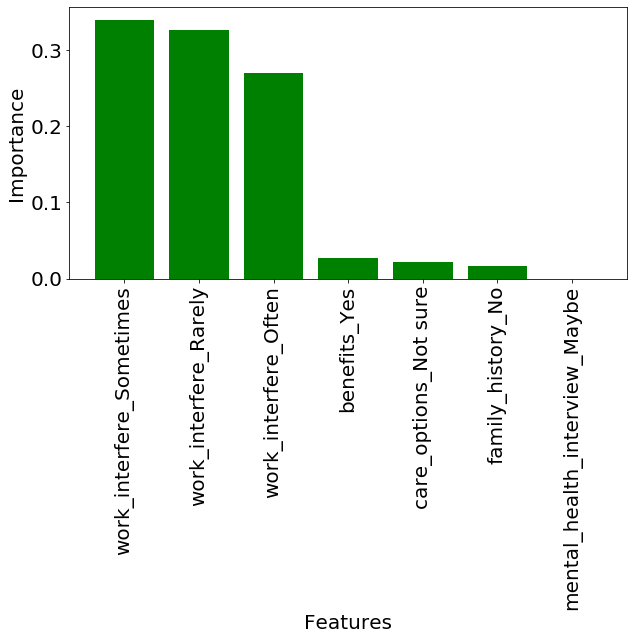

In [155]:
# Create a figure
fig = plt.figure(figsize=(10, 5))

# The bar plot of feature importance
plt.bar(df_fi_rfc['Features'][:7], df_fi_rfc['Importance'][:7], color='green')

# Set x-axis
plt.xlabel('Features')
plt.xticks(rotation=90)

# Set y-axis
plt.ylabel('Importance')

# Save and show the figure
plt.tight_layout()
plt.savefig('./figure/feature_importance_rfc.pdf')
plt.show()

In [181]:
# Get the best_score, best_param and best_estimator obtained by GridSearchCV
best_score_gs, best_param_gs, best_estimator_gs = best_score_param_estimator_gs[0]

# Get the prediction on the testing data using best_model
y_test_pred = best_estimator_gs.predict(X_test)

print(y_test_pred)
print(y_test)

np.count_nonzero(y_test)
y_test.shape  #249 total, 127 non zero, 122 zeros

#y_train.shape # total 796, 400 zeroes, 396 non zero

[0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0
 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0
 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0]
[1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1
 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 0 1
 0 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0
 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 0

(249,)

### Evaluating Results

65.06024096385542
ROC_AUC :  65.48986704530786
Accuracy K:  30.70722579406967


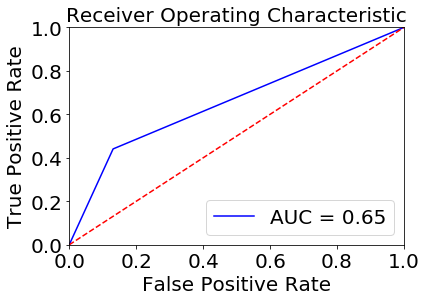

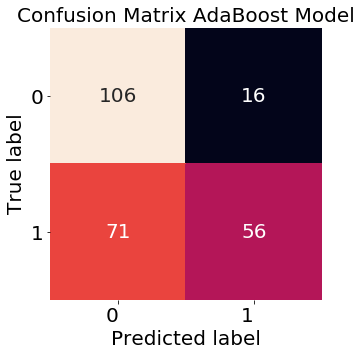

,0,1
0,106,16
1,71,56


In [184]:
from sklearn import metrics
import sklearn.metrics as metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score
from sklearn.metrics.classification import cohen_kappa_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

print(accuracy_score(y_test, y_test_pred)* 100)
print("ROC_AUC : ", roc_auc_score(y_test, y_test_pred) * 100)
print("Accuracy K: ", cohen_kappa_score(y_test, y_test_pred)* 100)

# ROC Graph
y_test_pred_score = best_estimator_gs.predict_proba(X_test)
preds = y_test_pred#y_test_pred_score[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_names = df[target].unique()

df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names )

import seaborn as sns
plt.figure(figsize=(5,5))
hm = sns.heatmap(df_cm, cbar=False, annot=True, square=True, fmt='d', annot_kws={'size': 20}, yticklabels=df_cm.columns, xticklabels=df_cm.columns)

hm.yaxis.set_ticklabels(hm.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
hm.xaxis.set_ticklabels(hm.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.ylabel('True label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)
plt.title("Confusion Matrix AdaBoost Model")
# plt.tight_layout()
plt.show()

(df == 0).sum(axis=1)

df_cm


# Generating the Submission File

In [ ]:
# Transform y_test_pred back to the original class
y_test_pred = le.inverse_transform(y_test_pred)